In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#first dataset cab_Data we give this dataframe to cab variable
cab = pd.read_csv("Cab_Data.csv")

In [3]:
#Looking range of features
cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [4]:
#checking is there any null in data
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [5]:
cab.head(n=10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,07/01/2016,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,03/01/2016,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,07/01/2016,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,12/01/2016,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,06/01/2016,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [6]:
#after first glimpse at cab data, lets get city data and check it out too
city = pd.read_csv("City.csv")

In [7]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NASHVILLE TN,"1,339,155","12,994"
freq,1,1,1


In [8]:
city.head(n=10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [9]:
customer = pd.read_csv("Customer_ID.csv")

In [10]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [11]:
customer.head(n=10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [12]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [13]:
transaction = pd.read_csv("Transaction_ID.csv")
print(transaction.describe())
transaction.head()

       Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [14]:
#There is no null any of datasets.
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

So far we checked dataset given, and try to understand what is it contains.
Cab dataset contains ; Company name, where is it oparate which city ?, KM traveled each call, price charged for each call and total cost , customer dataset contains information about customers and transaction dataset gives us payment type card or cash ?

In [15]:
#Lets merge them together, since they have different unique key so we merge them step by step first on transaction and cab data on transaction id then city data and customer data with customer id.
df = cab.merge(transaction, on= "Transaction ID")
df = df.merge(customer, on ="Customer ID").merge(city, on = "City")
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [16]:
df.dtypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object

In [17]:
df.shape

(359392, 14)

In [18]:
counted_df = df.groupby(["Company"]).agg({'Cost of Trip':'sum'})

In [19]:
print(counted_df)

            Cost of Trip
Company                 
Pink Cab    2.102092e+07
Yellow Cab  8.183351e+07


In [20]:
df['date_time'] = pd.to_datetime(df['Date of Travel'], format='%d/%m/%Y')
df1=df.set_index('date_time')

Text(0, 0.5, 'Price Charged/USD')

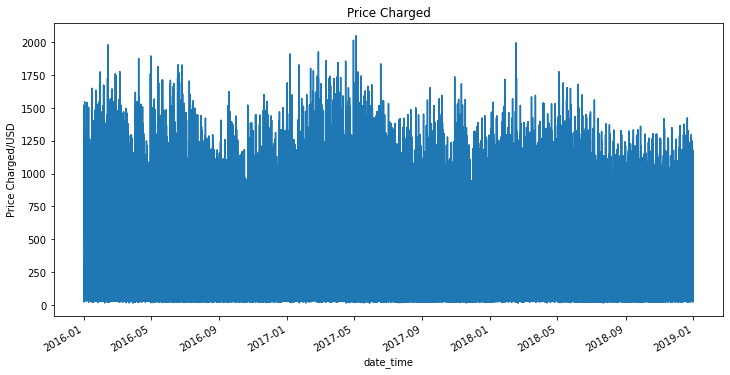

In [21]:
df1['Price Charged'].plot(figsize=(12,6), title= 'Price Charged')
plt.ylabel("Price Charged/USD")

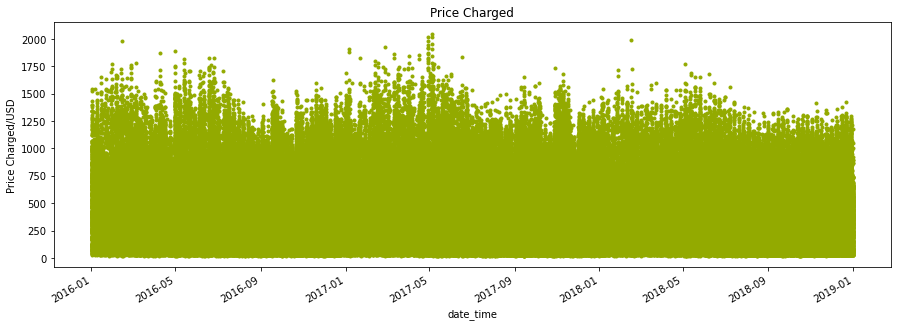

In [22]:
color_pal = ['#F8766D','#D39200','#93AA00','#00BA38','#00C19F','#00B9E3','#619CFF','#DB72FB']
df1['Price Charged'].plot(style='.',figsize=(15,5),color=color_pal[2],title='Price Charged')
plt.ylabel("Price Charged/USD")
plt.show()

<AxesSubplot:>

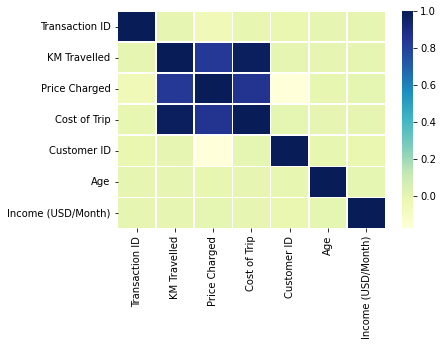

In [23]:
#Checking is there any correlation between features
#There are strong relation between KM Travelled, Price Charged,and Cost trip and it makes sense.
corr = df1.corr()
sns.heatmap(corr,cmap="YlGnBu", linewidths=.5)

In [24]:
#replacing spaces with '_' in column names
for col in df.columns:
    if ' ' in col:
        df = df.rename(columns={col:col.replace(' ','_')})

In [25]:
df.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode',
       'Gender', 'Age', 'Income_(USD/Month)', 'Population', 'Users',
       'date_time'],
      dtype='object')

In [26]:
#converting the date format into standard date format
df['Date_of_Travel'] = pd.to_datetime(df['Date_of_Travel'])
df['Year'] = df['Date_of_Travel'].dt.year #adding a new 'Year' column
df['Month'] = df['Date_of_Travel'].dt.month #adding a new 'Month' column

In [27]:
df.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode',
       'Gender', 'Age', 'Income_(USD/Month)', 'Population', 'Users',
       'date_time', 'Year', 'Month'],
      dtype='object')

In [28]:
df = df.drop(['Date_of_Travel'], axis =1 )

df['Profit'] = df['Price_Charged'] - df['Cost_of_Trip'] 
df['ProfitPercentage'] = ((df['Price_Charged'] - df['Cost_of_Trip'])/df['Cost_of_Trip'])*100

In [29]:
df.head(n=10)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,date_time,Year,Month,Profit,ProfitPercentage
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016-01-08,2016,8,57.3150,18.274427
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018-07-21,2018,7,281.2772,88.612790
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018-11-23,2018,11,194.6480,32.582415
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016-01-06,2016,6,23.6660,7.067558
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018-04-21,2018,4,253.9808,54.371732
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701",2018-05-04,2018,4,50.8912,58.155523
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701",2018-10-27,2018,10,25.0960,17.681458
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",2016-01-02,2016,2,27.5680,28.236644
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701",2016-09-21,2016,9,210.0920,42.510846
9,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701",2017-06-23,2017,6,118.9736,48.234548


<AxesSubplot:ylabel='Company'>

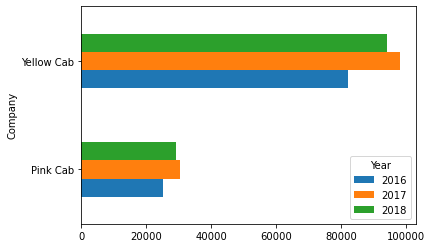

In [30]:
#Number of trip by 2 different company at 3 different years.
#We can detect year 2017 has more numbers of trips for both company
df.groupby('Year').Company.value_counts().unstack(0).plot.barh()

In [31]:
#visually displaying the counts with the tabluar data below it

df2= df.groupby(['Payment_Mode'])['Price_Charged']

In [32]:
df2.describe()

,count,mean,std,min,25%,50%,75%,max
Payment_Mode,,,,,,,,
Card,215504.0,423.392533,273.799456,15.60,207.10,387.090,583.17,2016.70
Cash,143888.0,423.519362,275.245426,16.38,205.59,385.275,584.42,2048.03


<AxesSubplot:xlabel='Payment_Mode'>

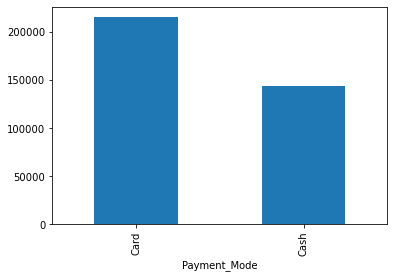

In [33]:
#Card mostly used as payment method
df2.size().plot(kind = "bar")

<AxesSubplot:xlabel='Payment_Mode'>

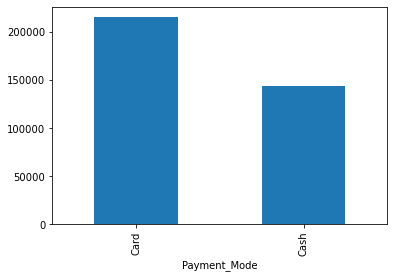

In [34]:
df2.size().plot(kind = "bar")

In [35]:
df3 = df[['Year','Company','Payment_Mode','Price_Charged']]

In [36]:
result = df3.groupby(['Company'])['Payment_Mode'].size()

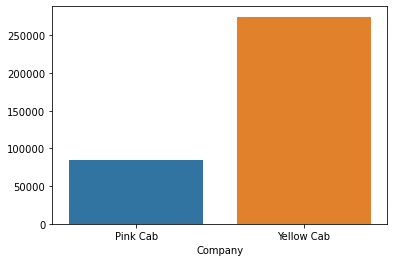

In [37]:
_ =sns.barplot(x = result.index, y = result.values)

Until this point;

2017 was top year.

Payments mostly done with cards by customers.

And yellow cab has much more revenue than Pink cab.

Text(0, 0.5, 'Count of trips')

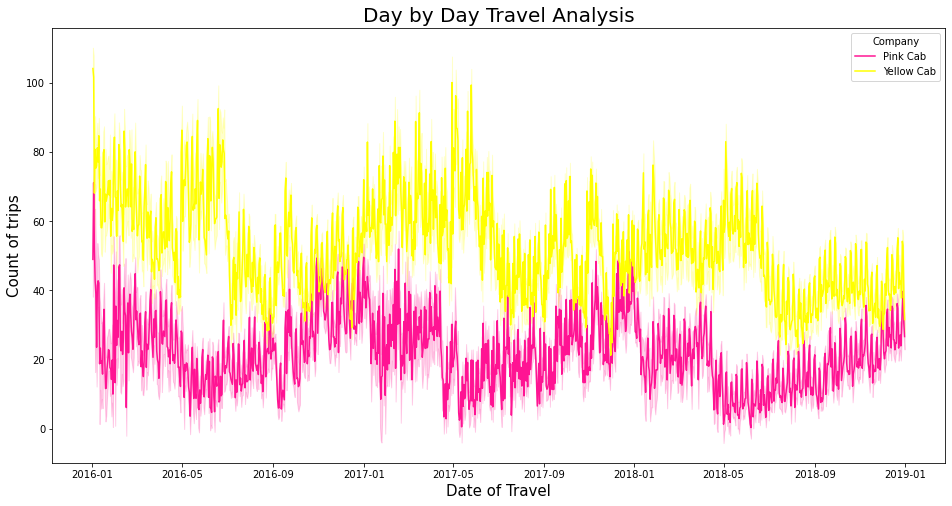

In [38]:
#Its look like similiar pattern.
plt.figure(figsize = (16, 8))
sns.lineplot(x = "date_time", y = 'ProfitPercentage', data = df, hue = "Company", 
             palette = ['deeppink', 'yellow'])
plt.title('Day by Day Travel Analysis', size=20)
plt.xlabel('Date of Travel', size=15)
plt.ylabel('Count of trips', size=15)

In [39]:
#Lets divide data as company and continue
pink_cab = df[df["Company"] == "Pink Cab"]
yellow_cab = df[df["Company"] == "Yellow Cab"]

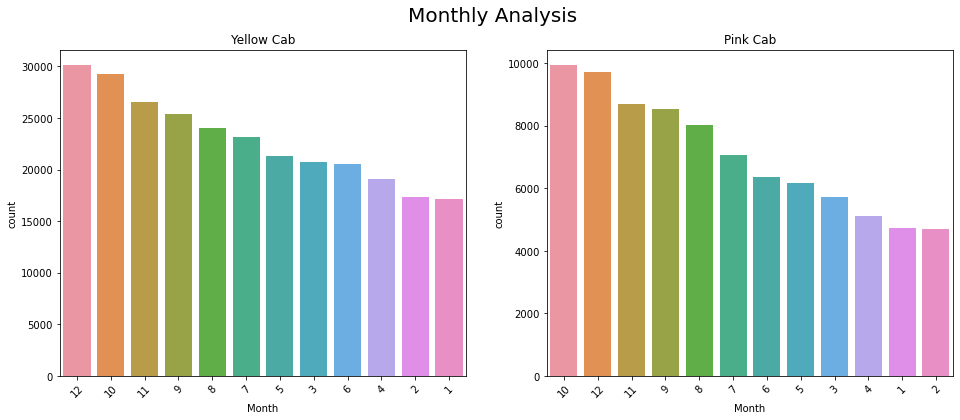

In [40]:
fig, ax = plt.subplots(1,2, figsize = (16,6))

month_yellow = yellow_cab.groupby(["Month"]).size().reset_index().rename(columns = {0 : 'count'})
month_pink = pink_cab.groupby(["Month"]).size().reset_index().rename(columns = {0 : 'count'})

sns.barplot(x='Month', y='count', data=month_yellow, order=month_yellow.sort_values('count', ascending=False).Month, ax=ax[0]).set_title("Yellow Cab")
sns.barplot(x='Month', y='count', data=month_pink, order=month_pink.sort_values('count', ascending=False).Month, ax=ax[1]).set_title("Pink Cab")
plt.suptitle("Monthly Analysis", size=20)
ax[0].tick_params(axis= 'x', labelrotation=45)
ax[1].tick_params(axis= 'x', labelrotation=45)
plt.show()

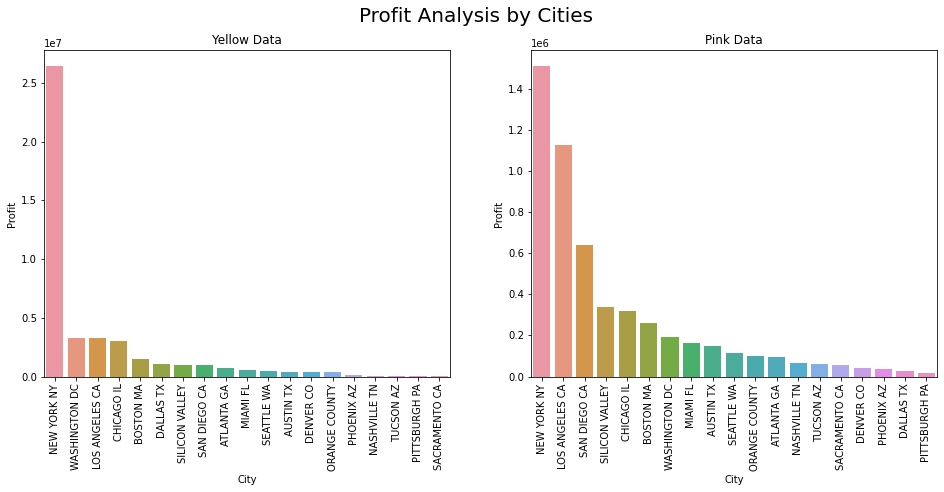

In [41]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
profit_yellow= pd.DataFrame(yellow_cab.groupby('City').Profit.sum().reset_index())
profit_pink= pd.DataFrame(pink_cab.groupby('City').Profit.sum().reset_index())
sns.barplot(x='City', y='Profit', data=profit_yellow, ax=ax[0], order=profit_yellow.sort_values('Profit', ascending=False).City).set_title("Yellow Data")
sns.barplot(x='City', y='Profit', data=profit_pink, ax=ax[1], order=profit_pink.sort_values('Profit', ascending=False).City).set_title("Pink Data")

plt.suptitle("Profit Analysis by Cities", size=20)
ax[0].tick_params(axis= 'x', labelrotation=90)
ax[1].tick_params(axis= 'x', labelrotation=90)
plt.show()

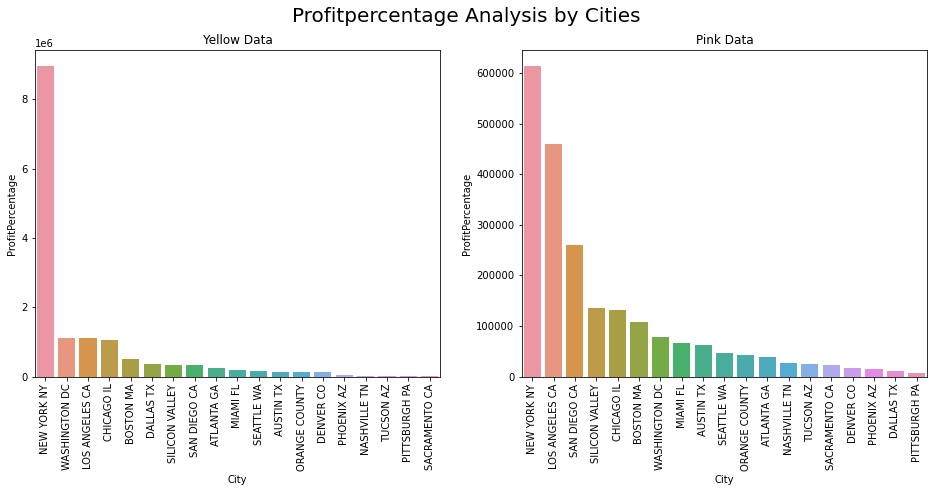

In [42]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
profit_yellow= pd.DataFrame(yellow_cab.groupby('City').ProfitPercentage.sum().reset_index())
profit_pink= pd.DataFrame(pink_cab.groupby('City').ProfitPercentage.sum().reset_index())
sns.barplot(x='City', y='ProfitPercentage', data=profit_yellow, ax=ax[0], order=profit_yellow.sort_values('ProfitPercentage', ascending=False).City).set_title("Yellow Data")
sns.barplot(x='City', y='ProfitPercentage', data=profit_pink, ax=ax[1], order=profit_pink.sort_values('ProfitPercentage', ascending=False).City).set_title("Pink Data")

plt.suptitle("Profitpercentage Analysis by Cities", size=20)
ax[0].tick_params(axis= 'x', labelrotation=90)
ax[1].tick_params(axis= 'x', labelrotation=90)
plt.show()

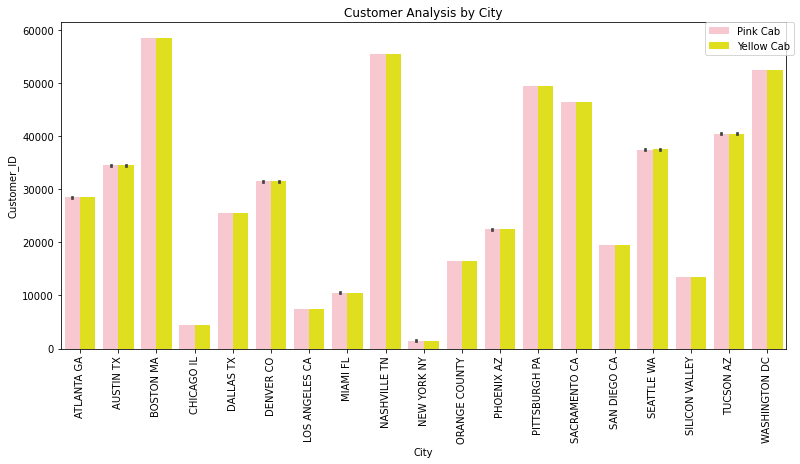

In [43]:
#As you can see ; yellow cab has more trips and more revenue but in some cities pinkcab has more profit and same amount of customer.
#So if live or want to invest certain cities like San Diego or Los Angeles we should pick Pink cab instead of yellow cab.
#for both invest or work as cab driver.
plt.figure(figsize = (13,6))
sns.barplot(x = "City", y = 'Customer_ID', data = df, hue= 'Company',
             palette = ['pink', 'yellow'])
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Customer Analysis by City")

plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Customer Analysis by Gender'}, xlabel='Year,Gender'>

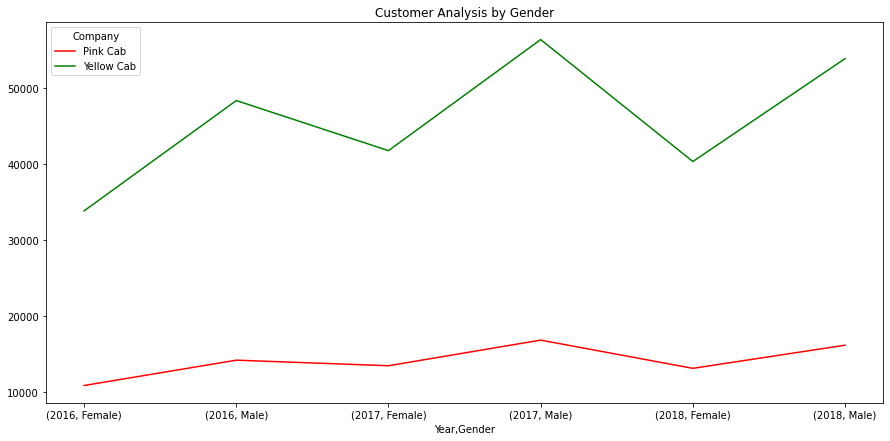

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title(label='Customer Analysis by Gender')
df.groupby(['Year','Gender', 'Company']).count()['Profit'].unstack().plot(ax=ax, color=["red", "green"])

In [45]:
'''If we generalize ;
Yellow cab is more profitable for investors, but if we desire invest certain cities, people in some cities prefer Pink cab more.
We definitly support card payment infrastructure, cause customers prefer credit card more than cash.
Male using more cab then females in general but, its obvious different in yellow cab while in pink cab its not that much different.
Maybe its related with color? maybe pink cab focus on that and advertise with focus of female.
'''

'If we generalize ;\nYellow cab is more profitable for investors, but if we desire invest certain cities, people in some cities prefer Pink cab more.\nWe definitly support card payment infrastructure, cause customers prefer credit card more than cash.\nMale using more cab then females in general but, its obvious different in yellow cab while in pink cab its not that much different.\nMaybe its related with color? maybe pink cab focus on that and advertise with focus of female.\n'

In [46]:
from pycaret.regression import *
import matplotlib.pyplot as plt
import jinja2

In [47]:
#lets make profit forecast with dataset.

In [52]:
#We divide dataset for validation. 5% of dataset will be not seen by model until predict phase
data = df.sample(frac=0.95, random_state=123)
data_unseen = df.drop(data.index)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (341422, 18)
Unseen Data For Predictions: (17970, 18)


In [53]:
data.columns

Index(['Transaction_ID', 'Company', 'City', 'KM_Travelled', 'Price_Charged',
       'Cost_of_Trip', 'Customer_ID', 'Payment_Mode', 'Gender', 'Age',
       'Income_(USD/Month)', 'Population', 'Users', 'date_time', 'Year',
       'Month', 'Profit', 'ProfitPercentage'],
      dtype='object')

In [54]:
data = data.drop(['ProfitPercentage','Year','Month'], 1)
data_unseen = data_unseen.drop(['ProfitPercentage','Year','Month'], 1)

In [56]:
reg = setup(data=data,
           target='Profit',
            use_gpu=True,
            session_id = 123)

,Description,Value
0,session_id,123
1,Target,Profit
2,Original Data,"(341422, 15)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(238995, 47)"


In [57]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0035,0.0000,0.0043,1.0000,0.0004,0.0004,0.1200
lasso,Lasso Regression,0.0077,0.0001,0.0101,1.0000,0.0009,0.0008,0.2570
ridge,Ridge Regression,0.0006,0.0000,0.0007,1.0000,0.0001,0.0000,0.0810
en,Elastic Net,0.0069,0.0001,0.0089,1.0000,0.0008,0.0007,0.2530
lar,Least Angle Regression,0.0307,0.0035,0.0393,1.0000,0.0036,0.0029,0.1030
omp,Orthogonal Matching Pursuit,0.0007,0.0000,0.0009,1.0000,0.0001,0.0001,0.0950
br,Bayesian Ridge,0.0024,0.0000,0.0029,1.0000,0.0003,0.0002,1.6230
et,Extra Trees Regressor,0.5131,2.3261,1.5115,0.9999,0.0369,0.0229,61.2890
rf,Random Forest Regressor,0.5189,1.9800,1.4017,0.9999,0.0421,0.0279,42.5440
dt,Decision Tree Regressor,1.5944,8.8207,2.9646,0.9997,0.0952,0.0808,3.3040


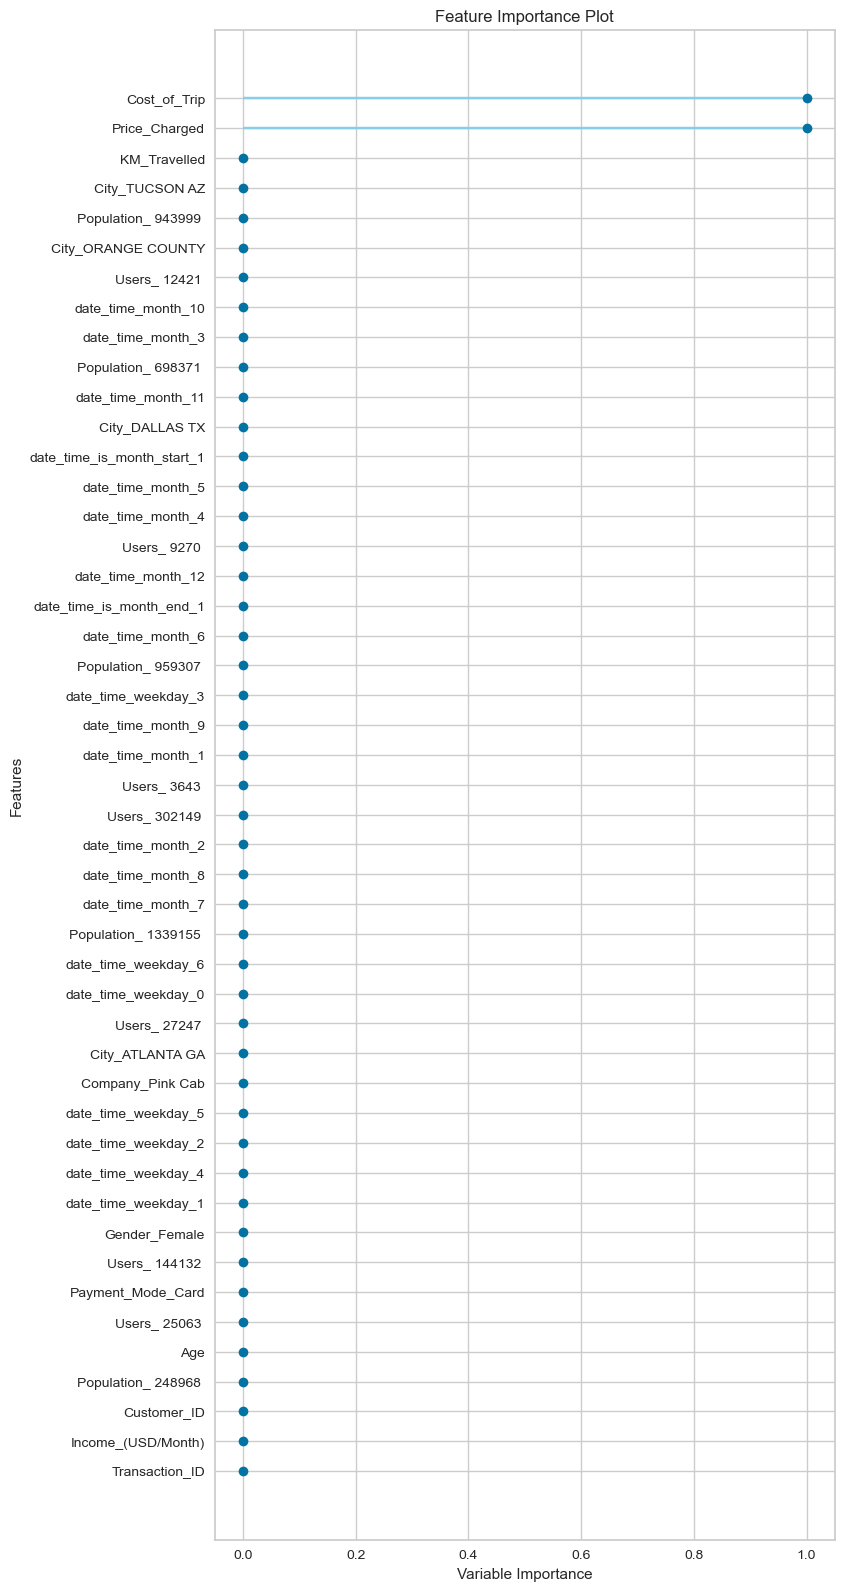

In [58]:
plot_model(best, plot='feature_all')

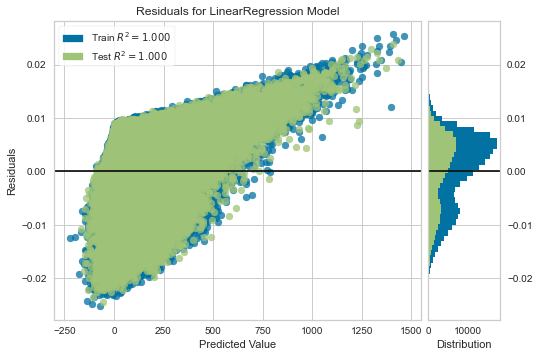

In [59]:
plot_model(best)

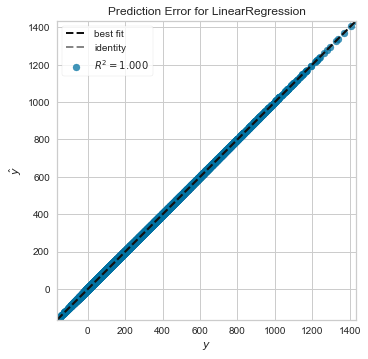

In [60]:
plot_model(best, plot='error')

In [62]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0034,0.0000,0.0044,1.0000,0.0004,0.0003
1,0.0025,0.0000,0.0031,1.0000,0.0003,0.0002
2,0.0025,0.0000,0.0031,1.0000,0.0003,0.0003
3,0.0042,0.0000,0.0050,1.0000,0.0005,0.0004
4,0.0022,0.0000,0.0027,1.0000,0.0003,0.0003
5,0.0019,0.0000,0.0025,1.0000,0.0002,0.0001
6,0.0043,0.0000,0.0050,1.0000,0.0005,0.0004
7,0.0067,0.0001,0.0077,1.0000,0.0008,0.0007
8,0.0050,0.0000,0.0064,1.0000,0.0006,0.0004
9,0.0023,0.0000,0.0030,1.0000,0.0003,0.0002


In [64]:
tuned_lr = tune_model(lr)
print(tuned_lr.get_params())

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0005,0.0000,0.0007,1.0000,0.0001,0.0000
1,0.0003,0.0000,0.0004,1.0000,0.0000,0.0000
2,0.0003,0.0000,0.0004,1.0000,0.0000,0.0000
3,0.0003,0.0000,0.0003,1.0000,0.0000,0.0000
4,0.0004,0.0000,0.0005,1.0000,0.0000,0.0000
5,0.0002,0.0000,0.0003,1.0000,0.0000,0.0000
6,0.0004,0.0000,0.0004,1.0000,0.0000,0.0000
7,0.0005,0.0000,0.0006,1.0000,0.0000,0.0000
8,0.0002,0.0000,0.0002,1.0000,0.0000,0.0000
9,0.0004,0.0000,0.0005,1.0000,0.0001,0.0000


{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True}


In [65]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [66]:
final_lr = finalize_model(tuned_lr)

In [67]:
predict_model(final_lr, data=data_unseen)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,date_time,Profit,Label
47,10319969,Pink Cab,ATLANTA GA,11.10,108.44,120.9900,29494,Card,Male,28,5644,"814,885","24,701",2018-04-17,-12.5500,-12.550531
55,10000393,Yellow Cab,ATLANTA GA,2.14,76.60,29.7888,27440,Cash,Male,24,20462,"814,885","24,701",2016-01-03,46.8112,46.810253
107,10099525,Yellow Cab,ATLANTA GA,15.21,227.55,204.4224,28137,Card,Male,36,10164,"814,885","24,701",2016-11-05,23.1276,23.127279
175,10316212,Yellow Cab,ATLANTA GA,34.41,602.34,454.2120,28469,Card,Male,28,25654,"814,885","24,701",2018-04-06,148.1280,148.128250
194,10002743,Pink Cab,ATLANTA GA,29.00,439.89,330.6000,28144,Cash,Male,33,11550,"814,885","24,701",2016-01-24,109.2900,109.289978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359296,10311440,Yellow Cab,WASHINGTON DC,38.15,663.22,540.2040,51880,Cash,Female,59,22853,"418,859","127,001",2018-03-17,123.0160,123.016632
359301,10186149,Yellow Cab,WASHINGTON DC,46.41,731.64,568.0584,51446,Cash,Male,35,5307,"418,859","127,001",2017-06-19,163.5816,163.582321
359304,10252944,Yellow Cab,WASHINGTON DC,4.80,88.88,58.7520,51446,Card,Male,35,5307,"418,859","127,001",2017-11-04,30.1280,30.127296
359353,10380877,Yellow Cab,WASHINGTON DC,4.72,68.84,58.9056,51257,Card,Male,39,15247,"418,859","127,001",2018-09-21,9.9344,9.933699


In [68]:
#saving results as csv so we can check it later.
results=predict_model(final_lr, data=data_unseen)
results.to_csv('cab_data_predicts.csv', index=False)